In [4]:
import os 
import random
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.preprocessing import MinMaxScaler

from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import sys
sys.path.append('../..')
from data.data_loader import get_splits
from utils.plot import plot_2D


#data = pd.read_csv("../../data/vehicles_cleaner.csv", names = ["City","Price","Year","Make","Model","Condition","Cylinders","Gas type","Odometer","Title status","Transmission type","Drive type","Size","Car type","Color","State"])
#data=data.drop('City',1)
data = get_splits('../../data/vehicles_cleaner.csv', 0.2)
#display(data)

"""new_data = data[data['Model'] != 'NOTVALID']
display(new_data['Model'])
price_data=new_data['Price']
features_data=new_data.drop('Price',1)"""



"""x = features_data.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
features_data = pd.DataFrame(x_scaled)
display(features_data)"""
X_train = data['X_train']
y_train = data['Y_train']
X_test = data['X_test']
y_test = data['Y_test']

display(X_train)
display(y_train)
display(X_test)
display(y_test)

scaler = MinMaxScaler() 
# It resizes to 0-1 for easier processing of data.
numerical = ['year', 'make', 'model','condition','cylinders','fuel','odometer', 'title_status','transmission','drive','size','type','paint_color','state']
X_train[numerical] = scaler.fit_transform(X_train[numerical])   
# Creating dummy variables for categorical data.
#features_data = pd.get_dummies(features_data)  
encoded = list(X_train.columns) 
display("There are {} features after one hot encoding".format(len(encoded))) 
display(encoded)

# It resizes to 0-1 for easier processing of data.
numerical = ['year', 'make', 'model','condition','cylinders','fuel','odometer', 'title_status','transmission','drive','size','type','paint_color','state']
X_test[numerical] = scaler.fit_transform(X_test[numerical])   
# Creating dummy variables for categorical data.
#features_data = pd.get_dummies(features_data)  
encoded = list(X_test.columns) 
display("There are {} features after one hot encoding".format(len(encoded))) 
display(encoded)

X_train,X_val,y_train,y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 0)

# Show the results of the split
print("The train set has an example of {}.".format(X_train.shape[0]))
print("Validation set has an example of {}.".format(X_val.shape[0]))
print("The test set has an example of {}.".format(X_test.shape[0]))

X_train=np.array(X_train) #lists are converted to numpy arrays
y_train=np.array(y_train)
X_val=np.array(X_val)
y_val=np.array(y_val)
X_test=np.array(X_test)
y_test=np.array(y_test)


,year,make,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
9024,7,4,2,-1,1,0,107131.0,0,1,0,-1,3,5,30
10516,11,4,2,-1,-1,0,56905.0,0,1,-1,-1,-1,4,36
5223,5,4,8,-1,-1,0,59569.0,0,1,-1,2,2,0,9
11204,19,4,2,3,-1,2,120700.0,1,1,1,0,8,10,38
5414,8,4,2,-1,3,0,62974.0,0,1,2,-1,8,6,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1287,10,4,4,3,3,0,154000.0,0,1,2,1,3,2,0
2860,14,4,18,-1,-1,0,109125.0,0,1,-1,3,7,-1,4
12327,8,4,12,2,3,1,72512.0,0,1,0,-1,2,0,43
9280,12,4,5,1,4,0,102447.0,0,1,2,-1,8,1,30


9024     10495
10516    13998
5223     14940
11204     2750
5414     16991
         ...  
1287      6000
2860     19999
12327    17995
9280      7995
10560    21220
Name: price, Length: 8613, dtype: int64

,year,make,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
4308,33,4,2,-1,3,0,217319.0,0,0,2,-1,-1,6,6
1690,5,4,26,-1,3,0,95309.0,0,1,2,-1,2,0,4
5034,8,4,4,2,3,0,94053.0,0,1,2,0,3,1,9
3570,12,4,2,3,3,0,95000.0,0,1,2,-1,3,1,4
2723,5,4,8,2,1,0,78000.0,0,1,-1,-1,2,-1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,6,4,20,2,4,0,56899.0,0,0,2,0,3,0,9
7283,11,4,2,2,0,0,114000.0,0,1,-1,1,3,-1,20
6789,14,4,4,2,3,0,154000.0,0,1,0,1,3,-1,15
6283,5,4,12,-1,4,0,12662.0,0,1,0,-1,2,-1,11


4308     7750
1690    21991
5034    12950
3570     5800
2723    12999
        ...  
5640        1
7283     5985
6789     4600
6283    34995
970     13950
Name: price, Length: 2154, dtype: int64

'There are 14 features after one hot encoding'

['year',
 'make',
 'model',
 'condition',
 'cylinders',
 'fuel',
 'odometer',
 'title_status',
 'transmission',
 'drive',
 'size',
 'type',
 'paint_color',
 'state']

'There are 14 features after one hot encoding'

['year',
 'make',
 'model',
 'condition',
 'cylinders',
 'fuel',
 'odometer',
 'title_status',
 'transmission',
 'drive',
 'size',
 'type',
 'paint_color',
 'state']

The train set has an example of 6459.
Validation set has an example of 2154.
The test set has an example of 2154.


In [11]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import ModelCheckpoint, Callback
from keras import backend
#from tensorflow.keras import backend

# Lost function is selected as mean absolute error
loss_function='mean_absolute_error'
# The sequential model is created to use compile-fit-evaluate-predict methods
price_predictor = Sequential()
# Neural network layers are created with RELU activation
price_predictor.add(Dense(128,activation='relu', input_dim=14))  
price_predictor.add(Dense(64))
price_predictor.add(Dense(32,activation='relu'))
price_predictor.add(Dense(8))
price_predictor.add(Dense(1))
price_predictor.summary()

test_errs = []
# Here the Adam optimizer (different type of stochastic gradient descent) is used.
price_predictor.compile(optimizer='Adam', loss=loss_function)

# It allows new callbacks by abstracting the base class.
checkpointer = ModelCheckpoint(filepath='price_prediction.hdf5', verbose=1, save_best_only=True)

# Trains the model according to the number of epoch given.
#price_predictor.fit(X_train, y_train, validation_data=[X_val,y_val], epochs=20, batch_size=500, callbacks=[checkpointer], verbose=0) 
i=0;
epoch = [10,30,50,70,90,110,130,150]
while(i<8):
    price_predictor.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epoch[i], batch_size=500, callbacks=[checkpointer], verbose=0)
    price_predictor.load_weights('price_prediction.hdf5')
    score=price_predictor.evaluate(X_test,y_test,verbose=1)
    display("The final model scores {} for test data.".format(score))
    test_errs.append(score)
    i=i+1
    
price_prediction=price_predictor.predict(X_test)

"""model = Sequential([
    Dense(85, activation='relu', input_shape=(1079,)),
    Dense(85, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])


model.fit(X_train, y_train,
          batch_size=32, epochs=10,
          validation_data=(X_val, y_val))"""





_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 128)               1920      
_________________________________________________________________
dense_17 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_18 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_19 (Dense)             (None, 8)                 264       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 9         
Total params: 12,529
Trainable params: 12,529
Non-trainable params: 0
_________________________________________________________________

Epoch 00001: val_loss improved from inf to 14817.88427, saving model to price_prediction.hdf5

Epoch 00002: val_loss improved from 14817.

'The final model scores 9122.310233141829 for test data.'


Epoch 00001: val_loss improved from 9337.99649 to 8587.20397, saving model to price_prediction.hdf5

Epoch 00002: val_loss improved from 8587.20397 to 8434.76374, saving model to price_prediction.hdf5

Epoch 00003: val_loss improved from 8434.76374 to 8348.18948, saving model to price_prediction.hdf5

Epoch 00004: val_loss improved from 8348.18948 to 8281.60873, saving model to price_prediction.hdf5

Epoch 00005: val_loss improved from 8281.60873 to 8195.85760, saving model to price_prediction.hdf5

Epoch 00006: val_loss improved from 8195.85760 to 8104.98417, saving model to price_prediction.hdf5

Epoch 00007: val_loss improved from 8104.98417 to 8022.97656, saving model to price_prediction.hdf5

Epoch 00008: val_loss improved from 8022.97656 to 7943.48675, saving model to price_prediction.hdf5

Epoch 00009: val_loss improved from 7943.48675 to 7860.61764, saving model to price_prediction.hdf5

Epoch 00010: val_loss improved from 7860.61764 to 7778.35251, saving model to price_predic

'The final model scores 6276.665702345201 for test data.'


Epoch 00001: val_loss improved from 6099.30701 to 6037.52116, saving model to price_prediction.hdf5

Epoch 00002: val_loss improved from 6037.52116 to 5981.55999, saving model to price_prediction.hdf5

Epoch 00003: val_loss improved from 5981.55999 to 5926.86237, saving model to price_prediction.hdf5

Epoch 00004: val_loss improved from 5926.86237 to 5870.32494, saving model to price_prediction.hdf5

Epoch 00005: val_loss improved from 5870.32494 to 5811.54129, saving model to price_prediction.hdf5

Epoch 00006: val_loss improved from 5811.54129 to 5752.45784, saving model to price_prediction.hdf5

Epoch 00007: val_loss improved from 5752.45784 to 5689.48335, saving model to price_prediction.hdf5

Epoch 00008: val_loss improved from 5689.48335 to 5616.61403, saving model to price_prediction.hdf5

Epoch 00009: val_loss improved from 5616.61403 to 5546.80302, saving model to price_prediction.hdf5

Epoch 00010: val_loss improved from 5546.80302 to 5467.87076, saving model to price_predic

'The final model scores 3749.019804179724 for test data.'


Epoch 00001: val_loss improved from 3434.69608 to 3428.11277, saving model to price_prediction.hdf5

Epoch 00002: val_loss improved from 3428.11277 to 3419.97220, saving model to price_prediction.hdf5

Epoch 00003: val_loss improved from 3419.97220 to 3412.08708, saving model to price_prediction.hdf5

Epoch 00004: val_loss improved from 3412.08708 to 3406.06220, saving model to price_prediction.hdf5

Epoch 00005: val_loss did not improve

Epoch 00006: val_loss did not improve

Epoch 00007: val_loss improved from 3406.06220 to 3386.51325, saving model to price_prediction.hdf5

Epoch 00008: val_loss did not improve

Epoch 00009: val_loss improved from 3386.51325 to 3375.86920, saving model to price_prediction.hdf5

Epoch 00010: val_loss did not improve

Epoch 00011: val_loss improved from 3375.86920 to 3370.22688, saving model to price_prediction.hdf5

Epoch 00012: val_loss improved from 3370.22688 to 3359.56144, saving model to price_prediction.hdf5

Epoch 00013: val_loss improved from

'The final model scores 3577.938068981401 for test data.'


Epoch 00001: val_loss did not improve

Epoch 00002: val_loss did not improve

Epoch 00003: val_loss did not improve

Epoch 00004: val_loss improved from 3230.34349 to 3227.38105, saving model to price_prediction.hdf5

Epoch 00005: val_loss did not improve

Epoch 00006: val_loss improved from 3227.38105 to 3226.20556, saving model to price_prediction.hdf5

Epoch 00007: val_loss improved from 3226.20556 to 3224.74259, saving model to price_prediction.hdf5

Epoch 00008: val_loss did not improve

Epoch 00009: val_loss improved from 3224.74259 to 3223.09266, saving model to price_prediction.hdf5

Epoch 00010: val_loss did not improve

Epoch 00011: val_loss improved from 3223.09266 to 3221.12509, saving model to price_prediction.hdf5

Epoch 00012: val_loss did not improve

Epoch 00013: val_loss did not improve

Epoch 00014: val_loss improved from 3221.12509 to 3216.83817, saving model to price_prediction.hdf5

Epoch 00015: val_loss improved from 3216.83817 to 3216.11622, saving model to pri

'The final model scores 3488.2549426575556 for test data.'


Epoch 00001: val_loss did not improve

Epoch 00002: val_loss did not improve

Epoch 00003: val_loss did not improve

Epoch 00004: val_loss did not improve

Epoch 00005: val_loss did not improve

Epoch 00006: val_loss did not improve

Epoch 00007: val_loss improved from 3167.46140 to 3167.08203, saving model to price_prediction.hdf5

Epoch 00008: val_loss did not improve

Epoch 00009: val_loss did not improve

Epoch 00010: val_loss did not improve

Epoch 00011: val_loss did not improve

Epoch 00012: val_loss improved from 3167.08203 to 3164.62453, saving model to price_prediction.hdf5

Epoch 00013: val_loss did not improve

Epoch 00014: val_loss did not improve

Epoch 00015: val_loss improved from 3164.62453 to 3162.98438, saving model to price_prediction.hdf5

Epoch 00016: val_loss did not improve

Epoch 00017: val_loss did not improve

Epoch 00018: val_loss did not improve

Epoch 00019: val_loss improved from 3162.98438 to 3160.22388, saving model to price_prediction.hdf5

Epoch 0002

'The final model scores 3457.971031366063 for test data.'


Epoch 00001: val_loss did not improve

Epoch 00002: val_loss did not improve

Epoch 00003: val_loss did not improve

Epoch 00004: val_loss did not improve

Epoch 00005: val_loss did not improve

Epoch 00006: val_loss did not improve

Epoch 00007: val_loss did not improve

Epoch 00008: val_loss did not improve

Epoch 00009: val_loss did not improve

Epoch 00010: val_loss did not improve

Epoch 00011: val_loss did not improve

Epoch 00012: val_loss did not improve

Epoch 00013: val_loss improved from 3137.77103 to 3134.88087, saving model to price_prediction.hdf5

Epoch 00014: val_loss did not improve

Epoch 00015: val_loss did not improve

Epoch 00016: val_loss did not improve

Epoch 00017: val_loss did not improve

Epoch 00018: val_loss did not improve

Epoch 00019: val_loss did not improve

Epoch 00020: val_loss did not improve

Epoch 00021: val_loss did not improve

Epoch 00022: val_loss did not improve

Epoch 00023: val_loss did not improve

Epoch 00024: val_loss did not improve

E

'The final model scores 3460.1051563769443 for test data.'


Epoch 00001: val_loss did not improve

Epoch 00002: val_loss did not improve

Epoch 00003: val_loss did not improve

Epoch 00004: val_loss did not improve

Epoch 00005: val_loss did not improve

Epoch 00006: val_loss did not improve

Epoch 00007: val_loss did not improve

Epoch 00008: val_loss did not improve

Epoch 00009: val_loss did not improve

Epoch 00010: val_loss did not improve

Epoch 00011: val_loss did not improve

Epoch 00012: val_loss did not improve

Epoch 00013: val_loss did not improve

Epoch 00014: val_loss did not improve

Epoch 00015: val_loss improved from 3119.43508 to 3117.87186, saving model to price_prediction.hdf5

Epoch 00016: val_loss did not improve

Epoch 00017: val_loss did not improve

Epoch 00018: val_loss did not improve

Epoch 00019: val_loss did not improve

Epoch 00020: val_loss did not improve

Epoch 00021: val_loss did not improve

Epoch 00022: val_loss did not improve

Epoch 00023: val_loss did not improve

Epoch 00024: val_loss did not improve

E

'The final model scores 3437.476927010794 for test data.'

"model = Sequential([\n    Dense(85, activation='relu', input_shape=(1079,)),\n    Dense(85, activation='relu'),\n    Dense(1, activation='sigmoid'),\n])\n\nmodel.compile(optimizer='sgd',\n              loss='binary_crossentropy',\n              metrics=['accuracy'])\n\n\nmodel.fit(X_train, y_train,\n          batch_size=32, epochs=10,\n          validation_data=(X_val, y_val))"

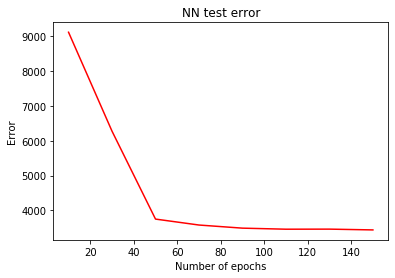

In [14]:
import matplotlib.pyplot as plt
plt.title("NN test error")
plt.xlabel("Number of epochs")
plt.ylabel("Error")
plt.plot(epoch, test_errs, 'r')
plt.show()

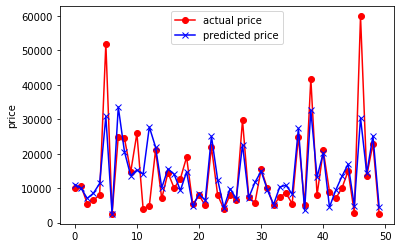

In [15]:
num_samples=50
idx=random.sample(range(len(y_test)),num_samples) 
plt.plot(range(num_samples),y_test[idx],'ro-')
plt.plot(range(num_samples),price_prediction[idx],'bx-')
plt.ylabel("price")
plt.legend(["actual price",'predicted price','mean price'])

In [16]:
dictData = {}
dictData['X_train'] = X_train
dictData['X_test'] = X_test
dictData['Y_train'] = y_train
dictData['y_test'] = y_test


In [17]:
display(dictData['Y_train'])

array([ 5100,  7995,  5400, ..., 15999, 13499, 21865])

In [18]:
display(dictData['y_test'])

array([ 7750, 21991, 12950, ...,  4600, 34995, 13950])